In [1]:
from gEcon.classes.model import gEconModel
from gEcon.solvers.steady_state import SteadyStateSolver
from gEcon.shared.dynare_convert import make_mod_file
from gEcon.plotting import plotting as gp

import numpy as np


# Load Model

In [2]:
file_path = 'tests/Test GCNs/Full_New_Keyensian.gcn'
model = gEconModel(file_path, verbose=True)

Model Building Complete.
Found:
	25 equations
	25 variables
	4 stochastic shocks
		 0 / 4 have a defined prior. 
	17 parameters
		 0 / 17 have a defined prior. 
	2 calibrating equations
	2 parameters to calibrate
 Model appears well defined and ready to proceed to solving.



# Solve Steady State

In [3]:
model.steady_state()
model.print_steady_state()

Steady state found! Sum of squared residuals is 3.2883221944320724e-27
B_ss                         0.000
C_ss                         1.506
Div_ss                       0.669
I_ss                         0.278
K_ss                        11.119
LHS_ss                       6.169
LHS_w_ss                     1.406
L_ss                         0.666
RHS_ss                       3.856
RHS_w_ss                     1.406
TC_ss                       -1.115
U_ss                      -147.270
Y_ss                         1.784
lambda_ss                    0.890
mc_ss                        0.625
pi_obj_ss                    1.000
pi_ss                        1.000
pi_star_ss                   1.000
q_ss                         0.890
r_G_ss                       1.010
r_ss                         0.035
shock_preference_ss          1.000
shock_technology_ss          1.000
w_ss                         1.088
w_star_ss                    1.088


In addition, the following parameter values were cal

# Perturbation Solution

In [4]:
model.solve_model()

Gensys found a unique solution.
Policy matrices have been stored in attributes model.P, model.Q, model.R, and model.S
Norm of deterministic part: 0.000000000
Norm of stochastic part:    0.000000000


# Simulation

In [5]:
simulation = model.simulate(shock_cov_matrix=np.eye(4) * 0.01, n_simulations=100)

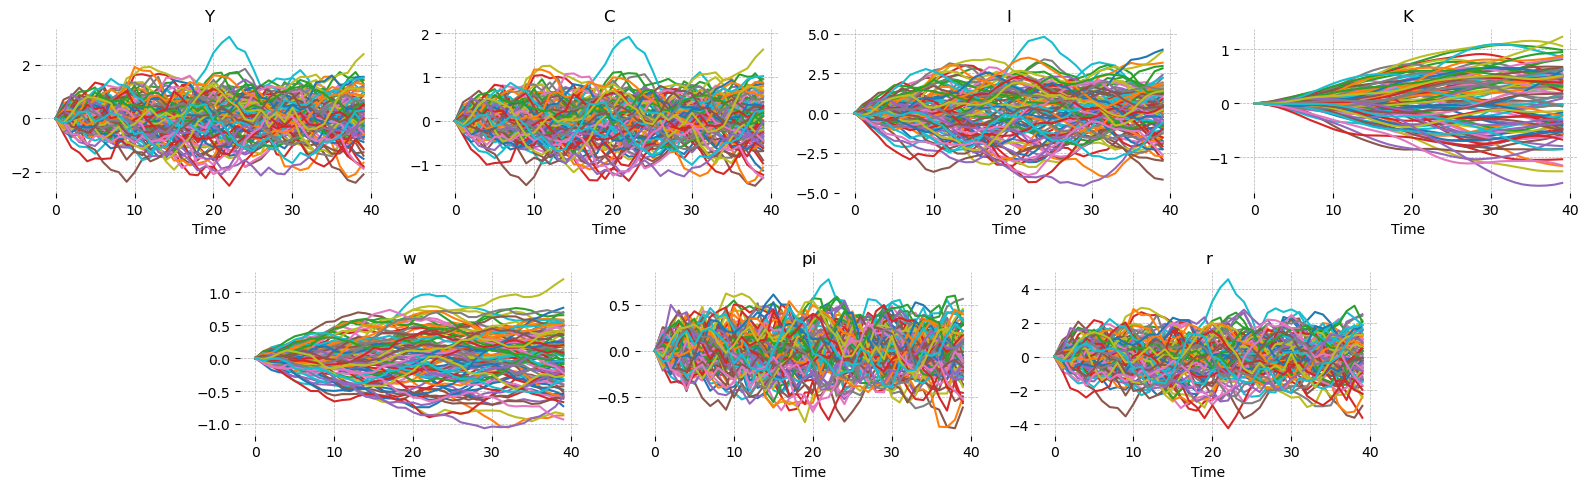

In [6]:
gp.plot_simulation(simulation, vars_to_plot=['Y', 'C', 'I', 'K', 'w', 'pi', 'r'],
                   n_cols=4, figsize=(16, 5));

# Impulse Response Functions

In [12]:
irf = model.impulse_response_function(shock_size=0.01, simulation_length=100)

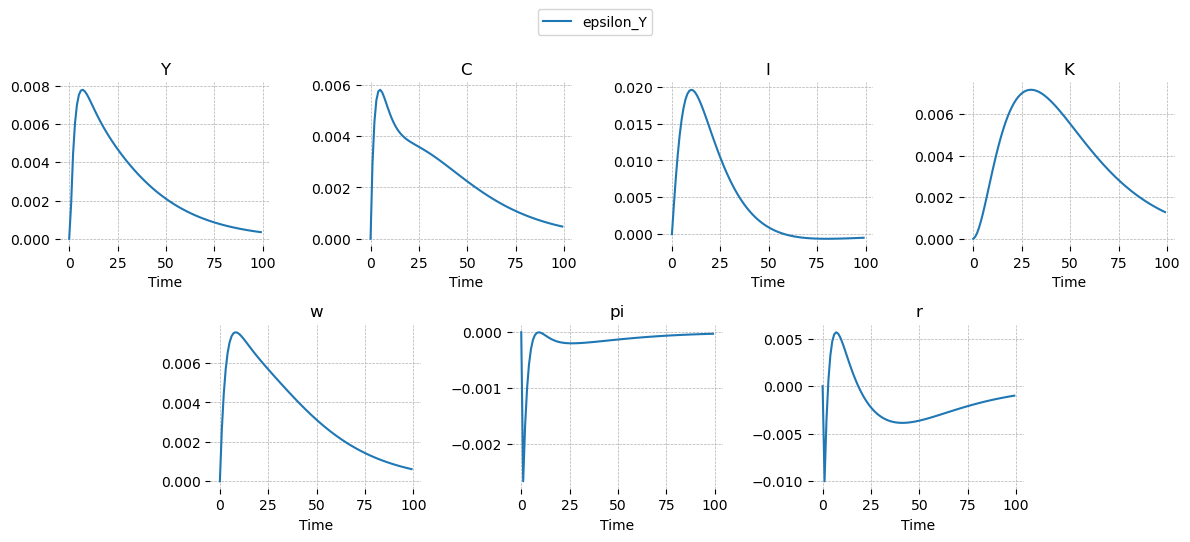

In [13]:
gp.plot_irf(irf, vars_to_plot=['Y', 'C', 'I', 'K', 'w', 'pi', 'r'],
            shocks_to_plot=['epsilon_Y'],
            n_cols=4, figsize=(12, 5), legend=True);

# Covnert to Dynare

**NOTE** This file won't run on Dynare because there are two steady-state variables used in the equations: r_G_ss and pi_ss. You will need to manually add:

`#r_G_ss = 1 / beta;
#var_pi_ss = 1;`
          
to the Dynare model block to get it to run.

In [9]:
print(make_mod_file(model))

var B, C, Div, I, K, L, LHS, LHS_w, RHS, RHS_w, TC;
var U, Y, mc, pi_obj, pi_star, q, r, r_G, shock_preference;
var shock_technology, var_lambda, var_pi, w, w_star;
varexo epsilon_R, epsilon_Y, epsilon_pi, epsilon_preference;

parameters eta_p, eta_w, gamma_I, gamma_R, gamma_Y;
parameters gamma_pi, param_alpha, param_beta, param_delta;
parameters phi_H, phi_pi, phi_pi_obj, psi_p, psi_w;
parameters rho_pi_dot, rho_preference, rho_technology;
parameters sigma_C, sigma_L;

param_alpha = 0.35;
param_beta = 0.99;
param_delta = 0.025;
eta_p = 0.75;
eta_w = 0.75;
gamma_I = 10.0;
gamma_R = 0.9;
gamma_Y = 0.05;
gamma_pi = 1.5;
phi_H = 0.5;
phi_pi = 0;
phi_pi_obj = 1;
psi_p = 0.6;
psi_w = 0.782;
rho_pi_dot = 0.924;
rho_preference = 0.95;
rho_technology = 0.95;
sigma_C = 2.0;
sigma_L = 1.5;

model;
-B / r_G + B(-1) / var_pi - C + Div - I + K(-1) * r + L * w = 0;
I *(- gamma_I *(I / I(-1) - 1) ^ 2 / 2 + 1) - K + K(-1) *(1 - param_delta) = 0;
-U + U(1) * param_beta + shock_preference *(- L ^(sigma_